In [1]:
pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.2/362.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 kB 20.0 MB/s eta 0:00:00


In [7]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jamm

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" >  Expérience randomisée </h1>
<hr style="border-width:2px;border-color:#75DFC1">


> Nous allons utiliser des données issues d'une expérience randomisée. Des chercheurs souhaitent étudier l'impact de différent type d'appentissage (présentiel, online ou hybride) sur les performances des étudiants mesurées à travers un examen final. Les étudiants ont été séparés de manière aléatoire dans trois groupes différents.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import graphviz as gr

%matplotlib inline

style.use("fivethirtyeight")

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('drive/My Drive/causal_inference/online_classroom.csv')
print(df.shape)
df.info()
df.head()


(323, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          323 non-null    int64  
 1   asian           247 non-null    float64
 2   black           247 non-null    float64
 3   hawaiian        247 non-null    float64
 4   hispanic        247 non-null    float64
 5   unknown         247 non-null    float64
 6   white           247 non-null    float64
 7   format_ol       323 non-null    int64  
 8   format_blended  323 non-null    float64
 9   falsexam        323 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 25.4 KB


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [ ]:
# Création de la variable 'class_format' qui décrit notre traitement

df['class_format'] = np.select(
     [df["format_ol"].astype(bool), df["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face")


In [ ]:

cols_to_drop = ['asian', 'black', 'hawaiian', 'hispanic', 'unknown', 'white',
       'format_ol', 'format_blended']

df = df.drop(cols_to_drop, axis = 1)

df.head()

,gender,falsexam,class_format
0,0,63.29997,face_to_face
1,1,79.96000,face_to_face
2,1,83.37000,blended
3,1,90.01994,blended
4,1,83.30000,online


In [ ]:
# Nous définisson l'ordre des facteurs (modalités) de notre traitement (je veux avoir les coeff de blended et onlide par rapport à face_to_face)

ordered_categories = ['face_to_face', 'blended', 'online']

df['class_format'] = pd.Categorical(df['class_format'], categories=ordered_categories, ordered=True)

In [ ]:
# Nous définissons notre modèle

model_exp = smf.ols('falsexam ~ C(class_format) + gender', data = df).fit()
model_exp.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,75.6826,1.314,57.594,0.000,73.097,78.268
C(class_format)[T.blended],-1.0789,1.502,-0.718,0.473,-4.034,1.877
C(class_format)[T.online],-4.5016,1.564,-2.878,0.004,-7.579,-1.424
gender,4.5235,1.281,3.532,0.000,2.003,7.043


In [ ]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.556
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           6.73e-05
Time:                        12:11:45   Log-Likelihood:                -1240.2
No. Observations:                 323   AIC:                             2488.
Df Residuals:                     319   BIC:                             2504.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     75.6826      1.314     57.594      0.000      73.097      78.268
C(class_format)[T.blended]    -1.0789      1.502     -0.718      0.473      -4.034       1.877
C(class_format)[T.online]     -4.5016      1.564     -2.878      0.004      -7.579      -1.424
gender                         4.5235      1.281      3.532      0.000       2.003       7.043
==============================================================================
Omnibus:                      165.558   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.513
Skew:                          -1.925   Prob(JB):                         0.00
Kurtosis:                      12.722   Cond. No.                         4.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compte tenu du fait que les données derivent d'une expérience randomisée nous pouvons affirmer que les effets estimez pour l'enseignement online et hybride sur la note dans l'examen finale par rapport à l'enseignement en présentiel est un effet causal.

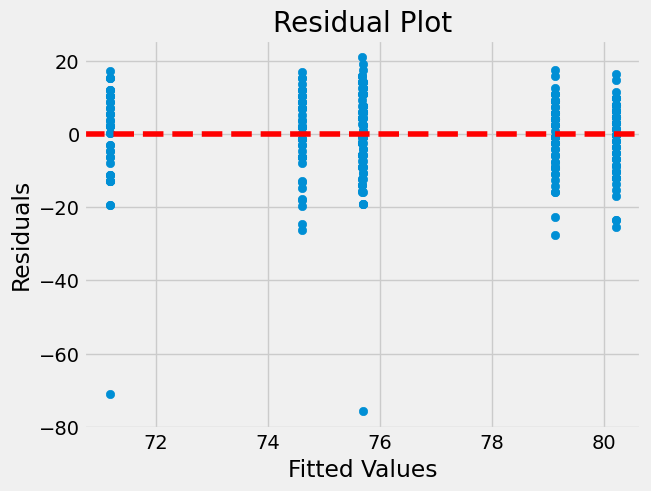

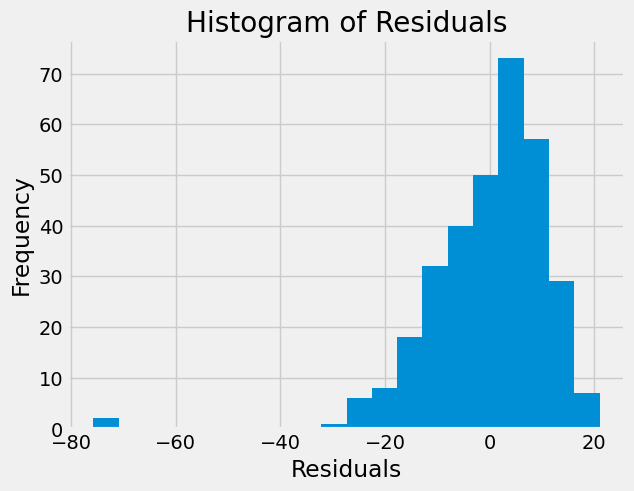

In [ ]:
residuals = model_exp.resid

# Check assumptions
# 1. Linearity, Independence, and Homoscedasticity
plt.scatter(model_exp.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='dashed')
plt.show()

# 2. Normality of Errors
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Beyond Confounders : good and bad controls ! </h1>
<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Good Controls </h2>



> Nous allons utiliser encore une fois des données issues d'une expérience randomizée. Le client débiteur d'une banque on été séparés de manière randomizée dans deux groupes. Nous souhaitons estimer si, en envoyant un e-mail aux clients, nous allons influencer de manière positive leur payement. Autrement dit, nous voulons savoir si envoyer un e-mail en

In [ ]:
df = pd.read_csv('drive/My Drive/causal_inference/collections_email.csv')
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payments      5000 non-null   int64  
 1   email         5000 non-null   int64  
 2   opened        5000 non-null   float64
 3   agreement     5000 non-null   float64
 4   credit_limit  5000 non-null   float64
 5   risk_score    5000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 234.5 KB


,payments,email,opened,agreement,credit_limit,risk_score
0,740,1,1.0,0.0,2348.495260,0.666752
1,580,1,1.0,1.0,334.111969,0.207395
2,600,1,1.0,1.0,1360.660722,0.550479
3,770,0,0.0,0.0,1531.828576,0.560488
4,660,0,0.0,0.0,979.855647,0.455140


In [ ]:
# l'expérience est randomizée, l'entreprise à sélectionné 5000 clients et de manière aléatoire nous avons assigné chaque observation à un groupe

print("Difference in means:",
      df.query("email==1")["payments"].mean() - df.query("email==0")["payments"].mean())

model = smf.ols('payments ~ email', data=df).fit()
model.summary().tables[1]

Difference in means: -0.6202804021329484


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,669.9764,2.061,325.116,0.000,665.937,674.016
email,-0.6203,2.941,-0.211,0.833,-6.387,5.146


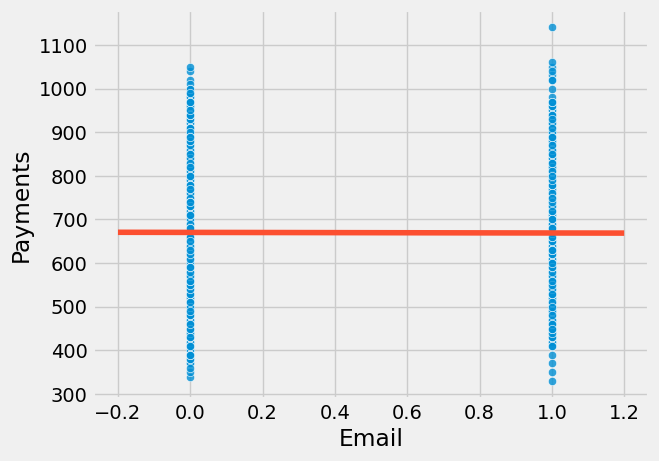

In [ ]:
# le signe du coeff pour "email" est négatifs, cependant l'interval de confiance est très grand

sns.scatterplot(df, x = "email", y = "payments", alpha=0.8)
plt.plot(np.linspace(-0.2, 1.2), model.params[0] + np.linspace(-1, 2) * model.params[1], c="C1")
plt.xlabel("Email")
plt.ylabel("Payments");

Nous pouvons voir à quel point les paiements varient considérablement dans un seul groupe de traitement. Visuellement, cela semble aller d'un peu moins de 400 à 1000 dans les deux groupes. Si l'impact de l'e-mail est de l'ordre de 5,00 ou 10,00 R$, il n'est pas étonnant qu'il soit difficile de le trouver au milieu de toute cette variabilité.

Heureusement, la régression peut nous aider à réduire cette variabilité. L'idée est d'utiliser des contrôles supplémentaires. Si une variable est un bon prédicteur du résultat, elle expliquera une grande partie de sa variance. Si le risque et la limite de crédit sont de bons prédicteurs des paiements, nous pouvons les contrôler pour faciliter la recherche de l'impact de l'e-mail sur les paiements.

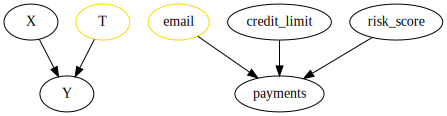

In [ ]:
# Réflechissons à notre problématique
# Par exemple, credit_limit représente la limite de crédit du client avant qu'il ne soit en retard dans ses paiements.
# risk_score correspond au risque estimé du client avant la réception de l'e-mail.


g = gr.Digraph()
g.edge("X", "Y"), g.edge("T", "Y")
g.node("T", color="gold")

g.node("email", color="gold")
g.edge("credit_limit", "payments")
g.edge("risk_score", "payments")
g.edge("email", "payments")

g

In [ ]:
model_2 = smf.ols('payments ~ email + credit_limit + risk_score', data=df).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,490.8653,9.715,50.527,0.000,471.820,509.911
email,4.4304,2.130,2.080,0.038,0.255,8.606
credit_limit,0.1511,0.008,18.833,0.000,0.135,0.167
risk_score,-8.0516,38.424,-0.210,0.834,-83.379,67.276


<h2 style = "text-align:center"> Bad Controls </h2>

In [ ]:
email_2 = smf.ols('payments ~ email + credit_limit + risk_score + opened + agreement', data=df).fit()
email_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,488.4416,9.716,50.272,0.000,469.394,507.489
email,-1.6095,2.724,-0.591,0.555,-6.949,3.730
credit_limit,0.1507,0.008,18.809,0.000,0.135,0.166
risk_score,-2.0929,38.375,-0.055,0.957,-77.325,73.139
opened,3.9808,3.914,1.017,0.309,-3.692,11.654
agreement,11.7093,4.166,2.811,0.005,3.542,19.876


Nous savons que nous DEVONS ajouter des variables confondantes. Ce sont des variables qui influencent à la fois le traitement (l'e-mail) et le résultat (les paiements). Nous savons également qu'il est une bonne idée d'ajouter des contrôles qui prédisent très bien le résultat. Ce n'est pas obligatoire, mais c'est bien d'en avoir. Par contre, il est déconseillé d'ajouter des contrôles qui prédisent uniquement le traitement (l'e-mail). Encore une fois, ce n'est pas un péché mortel, mais il est préférable de les éviter. Alors, quels types de contrôles sont ouverts à discussion ? Il s'avère qu'ils ne correspondent à aucune des catégories mentionnées ci-dessus.

Si vous y réfléchissez, le fait d'ouvrir l'e-mail (opened) et l'accord (agreement) sont sûrement corrélés avec l'e-mail. Après tout, vous ne pouvez pas ouvrir l'e-mail si vous ne l'avez pas reçu, et nous avons également dit que l'accord ne concerne que les renégociations qui ont eu lieu après l'envoi de l'e-mail. Mais ils ne causent pas l'e-mail ! Au contraire, ils sont causés par lui !

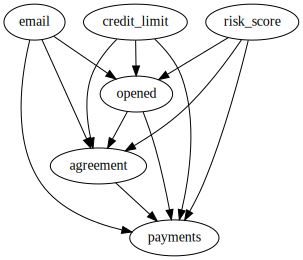

In [ ]:
g = gr.Digraph()

g.edge("email", "payments")
g.edge("email", "opened")
g.edge("email", "agreement")
g.edge("opened", "payments")
g.edge("opened", "agreement")
g.edge("agreement", "payments")

g.edge("credit_limit", "payments")
g.edge("credit_limit", "opened")
g.edge("credit_limit", "agreement")
g.edge("risk_score", "payments")
g.edge("risk_score", "opened")
g.edge("risk_score", "agreement")

g

Ce que nous remarquons avec ce graphique, c'est que "opened" (ouverture de l'e-mail) et "agreement" (accord) font tous deux partie du chemin causal entre l'e-mail et les paiements. Ainsi, si nous les contrôlons avec une régression, nous dirions "voici l'effet de l'e-mail en maintenant l'ouverture de l'e-mail et l'accord constants". Cependant, **les deux font partie de l'effet causal de l'e-mail**, donc **nous ne voulons pas les maintenir constants**. Au lieu de cela, nous pourrions avancer l'argument selon lequel l'e-mail augmente les paiements précisément parce qu'il stimule le taux d'accord. Si nous fixons ces variables, nous éliminons une partie de l'effet réel de la variable e-mail.







<h2 style = "text-align:center"> Matching </h2>

In [ ]:
df = pd.read_csv('drive/My Drive/causal_inference/trainees.csv')
print(df.shape)
df.info()
df.head()

(40, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   unit      40 non-null     int64
 1   trainees  40 non-null     int64
 2   age       40 non-null     int64
 3   earnings  40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


,unit,trainees,age,earnings
0,1,1,28,17700
1,2,1,34,10200
2,3,1,29,14400
3,4,1,25,20800
4,5,1,29,6100


In [ ]:
df.groupby('trainees')['earnings'].mean()

trainees
0    20723.809524
1    16426.315789
Name: earnings, dtype: float64

In [ ]:
model_train = smf.ols('earnings ~ trainees', data = df).fit()
model_train.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.072e+04,2036.378,10.177,0.000,1.66e+04,2.48e+04
trainees,-4297.4937,2954.688,-1.454,0.154,-1.03e+04,1683.959


In [ ]:
model_train = smf.ols('earnings ~ trainees + age', data = df).fit()
model_train.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,626.9025,6447.463,0.097,0.923,-1.24e+04,1.37e+04
trainees,-1540.9802,2774.066,-0.555,0.582,-7161.772,4079.812
age,608.9972,187.429,3.249,0.002,229.229,988.765


trainees
0    33.000000
1    28.473684
Name: age, dtype: float64


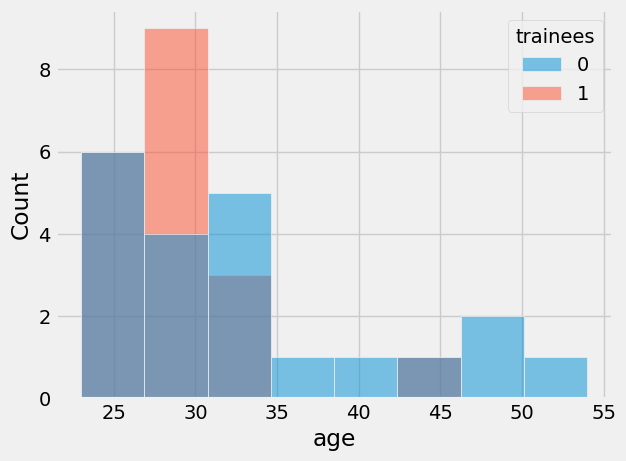

In [ ]:
sns.histplot(data=df, x='age', hue='trainees');
print(df.groupby('trainees')['age'].mean())

In [ ]:
unique_on_age = (df
                 .query("trainees==0")
                 .drop_duplicates("age"))

matches = (df
           .query("trainees==1")
           .merge(unique_on_age, on="age", how="left", suffixes=("_t_1", "_t_0"))
           .assign(t1_minuts_t0 = lambda d: d["earnings_t_1"] - d["earnings_t_0"]))

matches.head(7)

,unit_t_1,trainees_t_1,age,earnings_t_1,unit_t_0,trainees_t_0,earnings_t_0,t1_minuts_t0
0,1,1,28,17700,27,0,8800,8900
1,2,1,34,10200,34,0,24200,-14000
2,3,1,29,14400,37,0,6200,8200
3,4,1,25,20800,35,0,23300,-2500
4,5,1,29,6100,37,0,6200,-100
5,6,1,23,28600,40,0,9500,19100
6,7,1,33,21900,29,0,15500,6400


In [ ]:
matches["t1_minuts_t0"].mean()

2457.8947368421054

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > DOWHY library for causal inference ! </h1>
<hr style="border-width:2px;border-color:#75DFC1">

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dowhy

In [4]:

df = pd.read_csv('drive/My Drive/causal_inference/wage.csv')

In [5]:
print(df.shape)
df.info()
df.head()

(935, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   lhwage   935 non-null    float64
 3   IQ       935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
dtypes: float64(4), int64(12)
memory usage: 117.0 KB


,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
1,808,50,2.782539,119,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0
2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0


In [ ]:
cols_to_drop = ['lhwage', 'tenure', 'sibs', 'brthord']
df = df.drop(cols_to_drop, axis = 1)

In [ ]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'age', 'married', 'black',
       'south', 'urban', 'meduc', 'feduc'],
      dtype='object')

In [ ]:
df.educ.value_counts()

12    393
16    150
13     85
14     77
18     57
15     45
11     43
17     40
10     35
9      10
Name: educ, dtype: int64

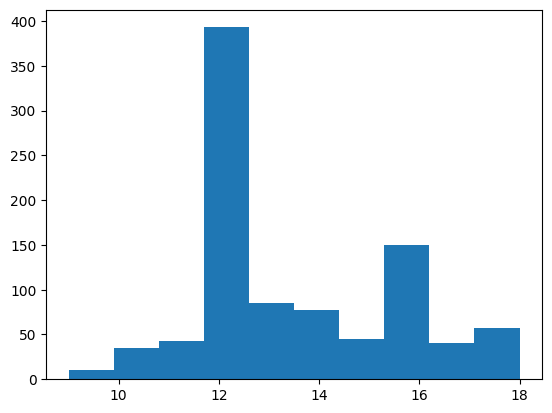

In [ ]:
plt.hist(df.educ);

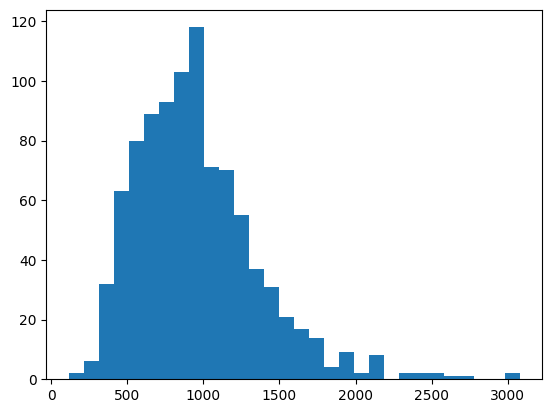

In [ ]:
plt.hist(df.wage, bins = 30);

In [ ]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'age', 'married', 'black',
       'south', 'urban', 'meduc', 'feduc'],
      dtype='object')

In [ ]:
causal_graph = """digraph {
IQ -> {educ, wage};
educ -> wage;
}"""

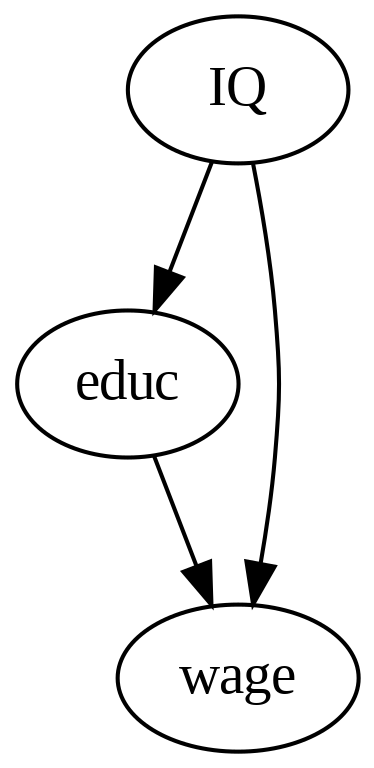

In [ ]:
model= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment="educ",
        outcome='wage')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d               
───────(E[wage|IQ])
d[educ]            
Estimand assumption 1, Unconfoundedness: If U→{educ} and U→wage then P(wage|educ,IQ,U) = P(wage|educ,IQ)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
# Step 3: Estimate
#Choose the first estimand
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d               
───────(E[wage|IQ])
d[educ]            
Estimand assumption 1, Unconfoundedness: If U→{educ} and U→wage then P(wage|educ,IQ,U) = P(wage|educ,IQ)

## Realized estimand
b: wage~educ+IQ
Target units: ate

## Estimate
Mean value: 42.057618716449156



Une fois produite notre estimation nous devons tester sa robustesse. DoWhy propose de d'utiliser une méthode "placebo_treatment_refuter". Cette méthode consiste à créer plusieurs nouveaux datasets à partir de notre dataset d'origine et à remplacer la variable traitement (pour nous la variable 'educ') par une nouvelle variable randomisée. Nous nous attendons ainsi que l'effet de la variable randomisée sur la cible soit nul.

In [ ]:
# Refute placebo
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:42.057618716449156
New effect:-0.26337750245551095
p value:0.98



Dans le réfutateur placebo, nous simulons plusieurs ensembles de données dans lesquels le traitement est un placebo, ce qui signifie que nous savons que l'effet causal réel est nul. Ensuite, nous appliquons l'estimateur donné à tous ces ensembles de données et enregistrons les estimations obtenues. Si l'estimateur est précis, toutes ces estimations obtenues devraient être nulles (ou plus précisément, avoir une distribution étroite centrée autour de zéro). En d'autres termes, le réfutateur placebo teste la méthode de l'estimateur, et non l'estimation obtenue.

Ensuite, le test statistique vérifie si cela est vrai en posant la question "quelle est la probabilité que zéro fasse partie de cette distribution simulée d'estimations ?".

In [ ]:
# Step 4 : Refute
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:42.057618716449156
New effect:42.03883513069286
p value:0.9



Nous repetons les mêmes étapes sur un modèle causal plus complexe.

In [8]:
import pygraphviz
# encodage des relations causales dans un diagrame causale
causal_graph = """digraph {
U->{IQ};
U2->{south, feduc, meduc};
south -> {meduc, feduc, wage, educ}
meduc -> educ;
feduc -> educ;
hours -> wage;
age -> {educ, wage};
IQ -> {educ, wage};
educ -> wage;
}"""

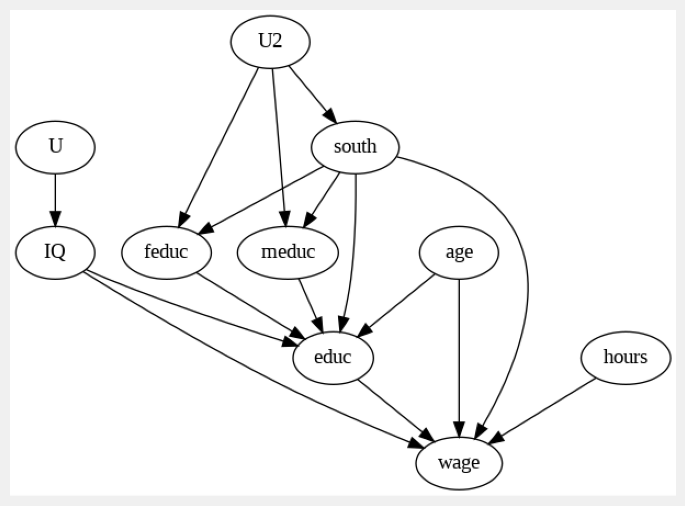

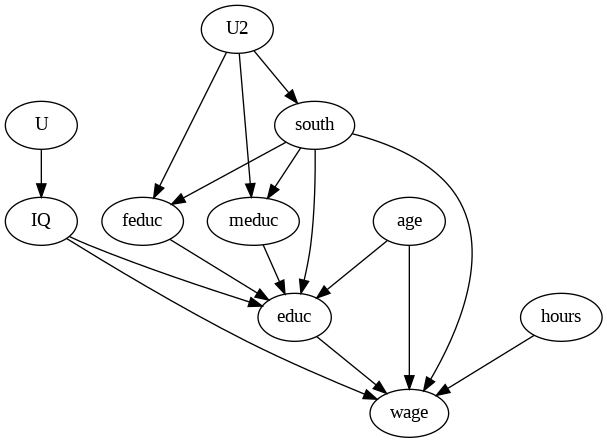

In [9]:
model_com= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment="educ",
        outcome='wage')
model_com.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [ ]:
identified_estimand = model_com.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                         
───────(E[wage|IQ,age,south])
d[educ]                      
Estimand assumption 1, Unconfoundedness: If U→{educ} and U→wage then P(wage|educ,IQ,age,south,U) = P(wage|educ,IQ,age,south)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
#Choose the first estimand
estimate = model_com.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                         
───────(E[wage|IQ,age,south])
d[educ]                      
Estimand assumption 1, Unconfoundedness: If U→{educ} and U→wage then P(wage|educ,IQ,age,south,U) = P(wage|educ,IQ,age,south)

## Realized estimand
b: wage~educ+IQ+age+south+educ*hours
Target units: ate

## Estimate
Mean value: 42.71105355706692



In [ ]:
# Refute placebo
res_placebo=model_com.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:42.71105355706692
New effect:0.3704015934730478
p value:1.0



In [ ]:
# Sensitivity analysis
refute_results=model_com.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:42.057618716449156
New effect:42.03017873511008
p value:0.96



In [ ]:
refute_results=model_com.refute_estimate(identified_estimand, estimate,
        method_name="add_unobserved_common_cause")
print(refute_results)

Refute: Add an Unobserved Common Cause
Estimated effect:42.057618716449156
New effect:7.794131834994573



# Conclusion
Afin de faire de l’inférence causale nous ne pouvons pas adopter une approche data driven. Les méthodes prédictives se basent sur la détection de corrélations entre données en entrée et labels et ne nous donnent aucune indication sur la structure causale des données. L'approche causale met l'accent sur l'analyse de la structure causale des données et non pas sur la prédiction.


Dans une démarche d'’inférence causale nous devons expliciter et encoder nos hypothèses. Ces hypothèses décrivent notre connaissance à priori de la structure causale au sein de nos données. Nous allons par la suite élaborer une stratégie analytique, choisir des estimateurs et tester la robustesse de nos estimations. Nos résultats sont valides dans le cadre de nos hypothèses de départ.


Les expériences randomisées sont le meilleur outil à notre disposition pour examiner des relations de causalité. En randomisant le traitement nous nous assurons que toute différence mesurée entre le groupe traitement et le groupe contrôle est due au traitement.


Les expériences randomisées sont difficiles à organiser, peuvent être coûteuses et dans certains cas pas éthiques. Souvent nous devons nous limier à l'analyse de données observationnelles.


Avec des données observationnelles nous devons prêter très attention aux variables confondantes qui influencent à la fois le traitement et la cible.


Nous pouvons utiliser les propriétés des diagrammes causales pour identifier les variables confondantes et pour identifier le set de variables qui peuvent être utilisées pour isoler la variable traitement.


Nous pouvons utiliser la régression pour estimer l’effet de notre traitement en contrôlant le set de variables “deconfounding”.

